# Modelo Poisson

Juan Sosa PhD

Email jcsosam@unal.edu.co

GitHub https://github.com/jstats1702

Samuel Sánchez (Python y revisión R)

Email ssanchezgu@unal.edu.co

GitHub https://github.com/Samuel-col

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as st
from scipy import special as sp
%matplotlib inline

## 1 Modelo general

Si Su estado de información acerca de las secuencia de **variables de conteo** $y_1,\ldots,y_n$ es intercambiable, entonces el modelamiento $y_1,\ldots,y_n$ admite representación jerárquica de la forma:
\begin{align}
	y_i\mid\theta &\stackrel{\text{iid}}{\sim}\textsf{Poisson}(\theta)\,,\quad i = 1,\ldots,n \\
	\theta &\sim p(\theta)
\end{align}
Este modelo es potencialmente **restrictivo** por la **relación media-varianza**: $\textsf{E}(y_i\mid\theta) = \textsf{Var}(y_i\mid\theta) = \theta$. 

Se recomienda chequear la **calidad del modelo** en términos de **bondad de ajuste** (chequeo de **estadísticos de prueba** relevantes por medio de la **distribución predictiva posterior**).

Alternativas: 

- Distribución Poisson con sobre(sub) dispersión.
- Distribución Binomial Negativa.

La **distribución muestral (distribución condicional conjunta)** de $\boldsymbol{y} = (y_1,\ldots,y_n)$ dado $\theta$ está dada por
$$
  p(\boldsymbol{y}\mid\theta) = \prod_{i=1}^n \frac{\theta^{y_i}\,e^{-\theta}}{y_i!} = \frac{\theta^{s}e^{-n\theta}}{\prod_{i=1}^n y_i!}\,,
$$
donde $s = \sum_{i=1}^n y_i$, lo cual indica que $s$ es un **estadístico suficiente** para $\theta$.

Por lo tanto la **distribución posterior** es
$$
p(\theta\mid\boldsymbol{y}) \propto \theta^{s}e^{-n\theta}p(\theta)\,.
$$

Dado que las $y_i$'s son **condicionalmente i.i.d.** dado $\theta$ y $s$ es un **estadístico suficiente** para $\theta$, entonces el modelo es equivalente a
\begin{align*}
	s\mid\theta &\sim \textsf{Poisson}(n\theta) \\
	\theta &\sim p(\theta) 
\end{align*}


## 2 Modelo Gamma-Poisson

La familia de distribuciones **Gamma** es **conjugada** para la distribución muestral **Poisson**.

La variable aleatoria $X$ tiene distribución Gamma con parámetros $\alpha,\beta > 0$, i.e., $X\mid\alpha,\beta\sim\textsf{Gamma}(\alpha,\beta)$, si su función de densidad de probabilidad es
$$
p(x\mid\alpha,\beta) = \frac{\beta^\alpha}{\Gamma(\alpha)}\,x^{\alpha-1}\,e^{-\beta x}\,,\quad x>0\,.
$$

Así, el **modelo Gamma-Poisson** es
\begin{align*}
	y_i\mid\theta&\stackrel{\text{iid}}{\sim}\textsf{Poisson}(\theta)\,,\quad i = 1,\ldots,n \\
	\theta &\sim \textsf{Gamma}(a,b)
\end{align*}
donde $a$ y $b$ con los **hiperparámetros** del modelo.

Bajo el **modelo Gamma-Poison** se tiene que la **distribución posterior** es
$$
\theta \mid \boldsymbol{y} \sim \textsf{Gamma}(\theta\mid a + s, b+n)\,,
$$
donde $s=\sum_{i=1}^n y_i$, y por lo tanto la **media posterior** es
$$
        \textsf{E}(\theta\mid \boldsymbol{y}) = \frac{a+s}{b+n} = \frac{b}{b+n}\cdot \frac{a}{b}+\frac{n}{b+n}\cdot \frac{s}{n}\,,
$$
la cual es un **promedio ponderado** del valor esperado previo y la media muestral.

- Tal observación conlleva a la siguiente interpretación de los hiperparámetros: 
    - $b$ = número previo de observaciones
    - $a$ = suma de conteos asociados con $b$ observaciones previas.
    - Si $n>>b$, entonces la mayoría de la información sobre $\theta$ proviene de los datos en lugar de la información previa.

También, la **distribución predictiva posterior** es **Binomial Negativa** con parámetros $a+s$ y $b+n$, i.e., $y^*\mid \boldsymbol{y}\sim \textsf{BN}(a+s,b+n)$:
$$
p(y^*\mid \boldsymbol{y}) = \frac{\Gamma(y^* +a+s)}{\Gamma(a+s)\Gamma(y^*+1)}\left[\frac{b+n}{b+n+1}\right]^{a+s} \left[\frac{1}{b+n+1}\right]^{y^*}\,,\quad y^*=0,1,\,\ldots.
$$

La variable aleatoria $X$ tiene distribución Binomial Negativa con parámetros $\alpha,\beta > 0$, i.e., $X\mid\alpha,\beta\sim\textsf{BN}(\alpha,\beta)$, si su función de masa de probabilidad es
$$
p(x\mid\alpha,\beta) = \frac{\Gamma(x+\alpha)}{\Gamma(\alpha)\,\Gamma(x+1)}\,\left[\frac{\beta}{\beta+1}\right]^{\alpha}\,\left[\frac{1}{\beta+1}\right]^x\,,\quad x=0,1,\,\ldots.
$$

Por medio de la distribución predictiva posterior se caracterizan diversos aspectos acerca de una observación futura. Por ejemplo, la varianza predictiva $\textsf{Var}(y^*\mid \boldsymbol{y})$ se puede interpretar como una medida de la **incertidumbre posterior acerca de una observación futura** $y^*$. 

Esto motiva un contraste interesante entre **inferencia** y **predicción**: $\theta$ (el objetivo inferencial) y $y^*$ (el objetivo predictivo) tienen la misma media posterior, pero la varianza posterior de $y^*$ es mayor:
$$
\textsf{E}(\theta\mid\boldsymbol{y}) = \textsf{E}(y^*\mid\boldsymbol{y}) = \frac{a+s}{b+n}\,,
$$
mientras que 
$$
\textsf{Var}(\theta\mid\boldsymbol{y}) = \frac{a+s}{b+n}\left(0 + \frac{1}{b+n}\right)
\qquad\text{y}\qquad
\textsf{Var}(y^*\mid\boldsymbol{y}) = \frac{a+s}{b+n}\left(1 + \frac{1}{b+n}\right)\,.
$$


## 3 Ejemplo: Número de hijos y educación

COLOMBIA - **Censo Nacional de Población y Vivienda** - CNPV - 2018 disponible en https://microdatos.dane.gov.co/index.php/catalog/643/study-description

La tabla de Personas contiene la información de una **muestra aleatoria simple** de personas que residen en hogares particulares o personas que residen en lugares especiales de alojamiento con las características correspondientes al censo.

Modelar el **número de hijos** de personas identificadas como: mujer, jefe de hogar, 40 a 44 años, alfabeta, lugar de nacimiento en Colombia, lugar de residencia hace 5 años en Colombia, ningún grupo étnico, informa si tiene hijos o no.

Diccionario de datos (ddi-documentation-spanish-643.pdf) disponible en https://microdatos.dane.gov.co/index.php/catalog/643/datafile/F11


In [2]:
# datos
df = pd.read_csv('CNPV2018_5PER_A2_11_muestra.txt')
df.shape

(71814, 48)

In [3]:
# P_NIVEL_ANOSR: Nivel educativo más alto alcanzado y último año o grado aprobado en ese nivel
#   1 Preescolar
#   2 Básica primaria
#   3 Básica secundaria
#   4 Media academica o clasica
#   5 Media tecnica
#   6 Normalista
#   7 Técnica profesional o Tecnológica
#   8 Universitario
#   9 Especialización, maestría, doctorado
#   10 Ninguno
#   99 No Informa
#   No Aplica
# recodificacion
df.P_NIVEL_ANOSR = [0 if d in [1,2,3,4,5,6,7,10] else d for d in df.P_NIVEL_ANOSR]
df.P_NIVEL_ANOSR = [1 if d in [8,9] else d for d in df.P_NIVEL_ANOSR]
# frecuencias
df.P_NIVEL_ANOSR.value_counts()

0.0     49813
1.0     16245
99.0     1633
Name: P_NIVEL_ANOSR, dtype: int64

In [4]:
# PA1_THNV: Hijos(as) nacidos vivos
# frecuencias
df.PA1_THNV.value_counts()

2.0     7009
1.0     6091
3.0     3984
4.0     1719
5.0      709
6.0      363
7.0      200
8.0      128
9.0       82
10.0      45
12.0      24
99.0      22
11.0      18
13.0      16
15.0       8
14.0       5
18.0       1
Name: PA1_THNV, dtype: int64

In [5]:
# no hijos hijos(as) nacidos vivos
df['PA1_THNV'] = df['PA1_THNV'].fillna(0)
# frecuencias
df.PA1_THNV.value_counts()

0.0     51390
2.0      7009
1.0      6091
3.0      3984
4.0      1719
5.0       709
6.0       363
7.0       200
8.0       128
9.0        82
10.0       45
12.0       24
99.0       22
11.0       18
13.0       16
15.0        8
14.0        5
18.0        1
Name: PA1_THNV, dtype: int64

In [6]:
# remover datos faltantes
df = df[df.P_NIVEL_ANOSR != 99]
df = df[df.PA1_THNV != 99]
df.shape

(70159, 48)

In [7]:
# filtro
def is_in(li,s):
    return [val in s for val in li]
indices = (df.P_PARENTESCOR == 1) & (df.P_SEXO == 2) & (df.P_EDADR == 9) & (df.PA1_GRP_ETNIC == 6) & is_in(df.PA_LUG_NAC, [2,3]) & is_in(df.PA_VIVIA_5ANOS, [2,3]) & is_in(df.PA_HNV, [1,2]) & (df.P_ALFABETA == 1)
# frecuencias
indices.value_counts()

False    69694
True       465
dtype: int64

In [8]:
# y1 : numero de hijos, mujeres de 40 años, sin pregrado o menos
# y2 : numero de hijos, mujeres de 40 años, con pregrado o mas
y1 = df.PA1_THNV[indices & (df.P_NIVEL_ANOSR == 0)]
y2 = df.PA1_THNV[indices & (df.P_NIVEL_ANOSR == 1)]

In [9]:
# tamaños de muestra
n1 = len(y1)
print(n1)

355


In [10]:
n2 = len(y2)
print(n2)

110


In [11]:
# estadisticos suficientes
s1 = np.sum(y1)
print(s1)

748.0


In [12]:
s2 = np.sum(y2)
print(s2)

127.0


In [13]:
# relacion media-varianza
# sobredispersion
#   varianza superior a la esperada
#   alternativa: Binomial-Negativa
# subdispersion
#   varianza menor a la esperada
#   alternativa: Comway-Maxwell-Poisson

In [14]:
r1 = np.mean(y1)/np.var(y1,ddof = 1)
print(r1)

1.3087393612289036


In [15]:
r2 = np.mean(y2)/np.var(y2,ddof = 1)
print(r2)

1.205731208082919


In [16]:
# analisis exploratorio de datos
pd.DataFrame(y1).describe()

,PA1_THNV
count,355.000000
mean,2.107042
std,1.268849
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,6.000000


In [17]:
pd.DataFrame(y2).describe()

,PA1_THNV
count,110.000000
mean,1.154545
std,0.978544
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,4.000000


<AxesSubplot:xlabel='No. de hijos', ylabel='F. Relativa'>

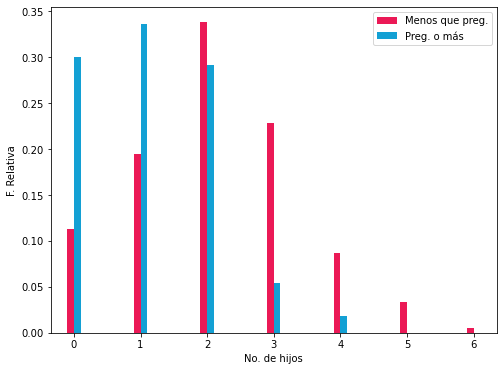

In [18]:
# distribucion de frecuencias
y1.value_counts()[range(7)]
tmp_df = pd.DataFrame({'Menos que preg.':y1.value_counts(normalize = True)[range(int(np.max(y1))+1)], 
                       'Preg. o más': y2.value_counts(normalize = True)[range(int(np.max(y2))+1)]}, 
                      index = range(7))
tmp_df.plot.bar(rot = 0, xlabel = 'No. de hijos', ylabel = 'F. Relativa', 
                color = {'Menos que preg.':'#EB1956','Preg. o más':'#13A0D4'}, width = 0.2,figsize = (8,6))

### 3.1 Distribuciones posterior y predictiva posterior

In [19]:
# previa Gamma(2,1)
a = 2
b = 1
# media de theta a priori
a/b

2.0

In [20]:
# CV de theta a priori
np.sqrt(a/b**2)/(a/b)

0.7071067811865476

In [21]:
# parametros de la posterior
ap1 = a + s1
print(ap1)

750.0


In [22]:
bp1 = b + n1
print(bp1)

356


In [23]:
ap2 = a + s2
print(ap2)

129.0


In [24]:
bp2 = b + n2
print(bp2)

111


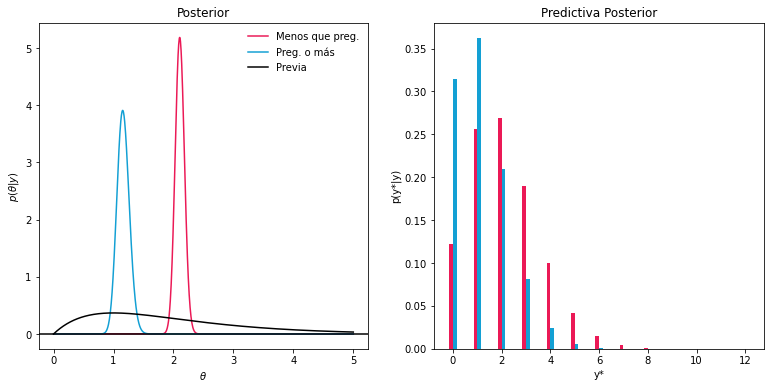

In [25]:
# grafico
f, axes = plt.subplots(1, 2, figsize = (13,6))
plt.subplots_adjust(wspace = 0.2, hspace = 0.4)

theta = np.linspace(start = 0, stop = 5, num = 1000)
axes[0].set_xlabel(r'$\theta$')
axes[0].set_ylabel(r'$p(\theta|y)$')
axes[0].plot(theta,st.gamma.pdf(x = theta,a = ap1, scale = 1/bp1), color = '#EB1956', label = 'Menos que preg.')
axes[0].plot(theta,st.gamma.pdf(x = theta,a = ap2, scale = 1/bp2), color = '#13A0D4', label = 'Preg. o más')
axes[0].plot(theta,st.gamma.pdf(x = theta,a = a, scale = 1/b), color = '#000000', label = 'Previa')
axes[0].axhline(y = 0, color = '#000000')
axes[0].set_title('Posterior')
axes[0].legend(loc = 0, frameon = False)

y = np.linspace(0,12,13); width = 0.15
axes[1].set_xlabel('y*')
axes[1].set_ylabel('p(y*|y)')
axes[1].bar(y - 0.5*width,st.nbinom.pmf(k = y, n = ap1, p = 1/(1+1/bp1)), width, color = '#EB1956')
axes[1].bar(y + 0.5*width,st.nbinom.pmf(k = y, n = ap2, p = 1/(1+1/bp2)), width, color = '#13A0D4')
axes[1].set_title('Predictiva Posterior')

plt.show()

In [26]:
# media posterior e intervalo de credibilidad
tab = [[ap1/bp1] + list(st.gamma.ppf(q = [0.025,0.975], a = ap1, scale = 1/bp1)),
       [ap2/bp2] + list(st.gamma.ppf(q = [0.025,0.975], a = ap2, scale = 1/bp2))]
tab = pd.DataFrame(data = tab,index = ["Menos que pregrado", "Pregrado o más"], columns = ["Media", "Q2.5%", "Q97.5%"])
round(tab, 3)

,Media,Q2.5%,Q97.5%
Menos que pregrado,2.107,1.959,2.260
Pregrado o más,1.162,0.970,1.371


In [27]:
# varianza posterior de theta y de y^*
tab = [[(a+s1)/(b+n1)*(0+1/(b+n1)), ((a+s1)/(b+n1))*(1+1/(b+n1))],
       [(a+s2)/(b+n2)*(0+1/(b+n2)), ((a+s2)/(b+n2))*(1+1/(b+n2))]]
tab = pd.DataFrame(data = tab,index = ["Menos que pregrado", "Pregrado o más"], columns = ["Var. Parámetro", "Var. Predictiva"])
round(tab, 3)

,Var. Parámetro,Var. Predictiva
Menos que pregrado,0.006,2.113
Pregrado o más,0.010,1.173


### 3.2 Cálculo de probabilidades

In [28]:
# probabilidad posterior de que theta_j > 2
# ¿como se lleva a cabo el calculo de manera analitica?
np.random.seed(1234)
th1_mc = st.gamma.rvs(a = ap1, scale = 1/bp1, size = 10000)
th2_mc = st.gamma.rvs(a = ap2, scale = 1/bp2, size = 10000)
round(np.mean(th1_mc > 2), 3)

0.925

In [29]:
round(np.mean(th2_mc > 2), 3)

0.0

In [30]:
# probabilidad posterior de que y_j^* > 2
np.random.seed(1234)
y1_mc = st.poisson.rvs(mu = th1_mc, size = 10000)
y2_mc = st.poisson.rvs(mu = th2_mc, size = 10000)
round(np.mean(y1_mc > 2), 3)

0.354

In [31]:
round(np.mean(y2_mc > 2), 3)

0.114

### 3.3 Comparación de grupos

In [32]:
# probabilidades
# ¿como se lleva a cabo el calculo de manera analitica?
print(np.mean(th1_mc > th2_mc))

1.0


In [33]:
print(np.mean(y1_mc > y2_mc))

0.5854


In [34]:
# inferencia bayesiana
est_B = np.mean(th1_mc - th2_mc)
cv_B = np.std(th1_mc - th2_mc)/np.mean(th1_mc - th2_mc)
ic_B = np.quantile(th1_mc - th2_mc, q = [0.025,0.975])
# inferencia frecuentista (asintotica)
yb1 = np.mean(y1)
yb2 = np.mean(y2)
sd1 = np.std(y1)
sd2 = np.std(y2)
est_F1 = yb1 - yb2
cv_F1 = np.sqrt(sd1**2/n1 + sd2**2/n2)/(yb1 - yb2)
ic_F1 = yb1 - yb2 + np.array([-1,1])*st.norm.ppf(0.975)*np.sqrt(sd1**2/n1 + sd2**2/n2)
# inferencia frecuentista (boostrap)
np.random.seed(1234)
out = []
for i in range(10000):
    yy1 = np.random.choice(y1, size = n1)
    yy2 = np.random.choice(y2, size = n2)
    out.append(np.mean(yy1) - np.mean(yy2))
out = np.array(out)
est_F2 = np.mean(out)
cv_F2 = np.std(out)/np.mean(out)
ic_F2 = np.quantile(out,q = [0.025,0.975])
# resultados
tab = pd.DataFrame(data = [[est_B, cv_B] + list(ic_B),
                           [est_F1, cv_F1] + list(ic_F1),
                           [est_F2, cv_F2] + list(ic_F2)],
                   columns = ["Estimación", "CV", "L. Inf.", "L. Sup."],
                   index = ["Bayesiana", "Frec. Asintótico", "Frec. Boostrap"])
round(tab,3)

,Estimación,CV,L. Inf.,L. Sup.
Bayesiana,0.948,0.134,0.694,1.186
Frec. Asintótico,0.952,0.120,0.728,1.177
Frec. Boostrap,0.952,0.120,0.726,1.178



¡Cuidado! Una evidencia fuerte de una diferencia entre dos poblaciones **no implica necesariamente** que la diferencia en términos prácticos también sea grande.


## 4 Ejemplo: Número de hijos y educación

In [35]:
# filtro
indices = (df.P_PARENTESCOR == 1) & (df.P_SEXO == 2) & (df.PA1_GRP_ETNIC == 6) & is_in(df.PA_LUG_NAC, [2,3]) & is_in(df.PA_VIVIA_5ANOS, [2,3]) & is_in(df.PA_HNV, [1,2]) & (df.P_ALFABETA == 1)
indices.value_counts()

False    65053
True      5106
dtype: int64

In [36]:
# previa  Gamma(2,1)
a = 2
b = 1
# P_EDADR: Edad en Grupos Quinquenales
#   1 de 00 A 04 Años
#   2 de 05 A 09 Años
#   3 de 10 A 14 Años
#   4 de 15 A 19 Años
#   5 de 20 A 24 Años
#   6 de 25 A 29 Años
#   7 de 30 A 34 Años
#   8 de 35 A 39 Años
#   9 de 40 A 44 Años
#   10 de 45 A 49 Años
#   11 de 50 A 54 Años
#   12 de 55 A 59 Años
#   13 de 60 A 64 Años
#   14 de 65 A 69 Años
#   15 de 70 A 74 Años
#   16 de 75 A 79 Años
#   17 de 80 A 84 Años
#   18 de 85 A 89 Años
#   19 de 90 A 94 Años
#   20 de 95 A 99 Años
#   21 de 100 y más Años
out = []
np.random.seed(1234)
for k in np.linspace(5,14,10):
    # datos
    y1 = df.PA1_THNV[indices & (df.P_EDADR == k) & (df.P_NIVEL_ANOSR == 0)] # sin
    y2 = df.PA1_THNV[indices & (df.P_EDADR == k) & (df.P_NIVEL_ANOSR == 1)] # con
    # tamaños de muestra
    n1 = len(y1)
    n2 = len(y2)
    # estadisticos suficientes
    s1 = np.sum(y1)
    s2 = np.sum(y2)
    # parametros de la posterior
    ap1 = a + s1
    bp1 = b + n1
    ap2 = a + s2
    bp2 = b + n2
    # muestras distribucion posterior
    th1_mc = st.gamma.rvs(a = ap1, scale = 1/bp1, size = 10000)
    th2_mc = st.gamma.rvs(a = ap2, scale = 1/bp2, size = 10000)
    # inferencia bayesiana
    est = np.mean(th1_mc - th2_mc)
    cv  = np.std(th1_mc - th2_mc)/np.mean(th1_mc - th2_mc)
    ic  = np.quantile(th1_mc - th2_mc, q = [.025,.975])
    # output
    out.append([est, cv] + list(ic))
out = pd.DataFrame(data = out, columns = ["Estimación", "CV", "L. Inf.", "L. Sup."],
                  index = ["Q" + str(int(i)) for i in np.linspace(5,14,10)])
round(out,3)

,Estimación,CV,L. Inf.,L. Sup.
Q5,0.533,0.133,0.393,0.674
Q6,0.850,0.103,0.680,1.023
Q7,1.023,0.104,0.810,1.233
Q8,1.116,0.105,0.883,1.343
Q9,0.943,0.137,0.689,1.193
Q10,1.108,0.132,0.809,1.380
Q11,0.984,0.141,0.707,1.251
Q12,1.161,0.134,0.844,1.456
Q13,1.154,0.143,0.826,1.467
Q14,0.870,0.218,0.490,1.230


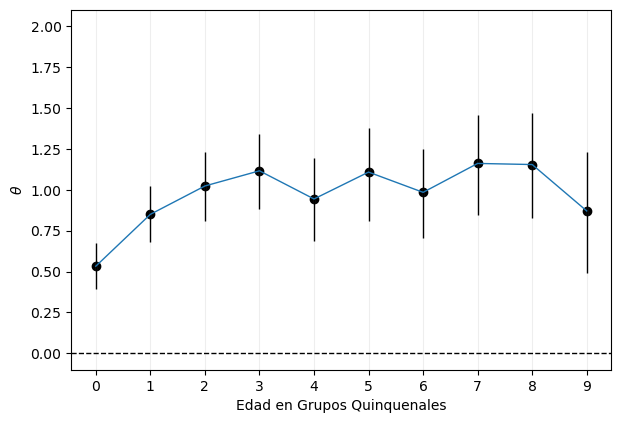

In [37]:
f = plt.figure(figsize = (6,4), dpi = 100)
axes = f.add_axes([0.1,0.1,0.9,0.9])
axes.set_xlabel('Edad en Grupos Quinquenales')
axes.set_ylabel(r'$\theta$')
axes.grid(axis = 'x', color = '#eeeeee')  #, dashes = range(10))
axes.vlines(range(10), ymin = out["L. Inf."], ymax = out["L. Sup."], color = '#000000', linewidth = 1)
axes.scatter(range(10), out['Estimación'], color = '#000000')
axes.plot(range(10), out['Estimación'], linewidth = 1)
axes.axhline(y = 0, ls = '--', color = '#000000', linewidth = 1)
axes.set_ylim([-0.1,2.1])
axes.set_xticks(ticks = range(10))
plt.show()

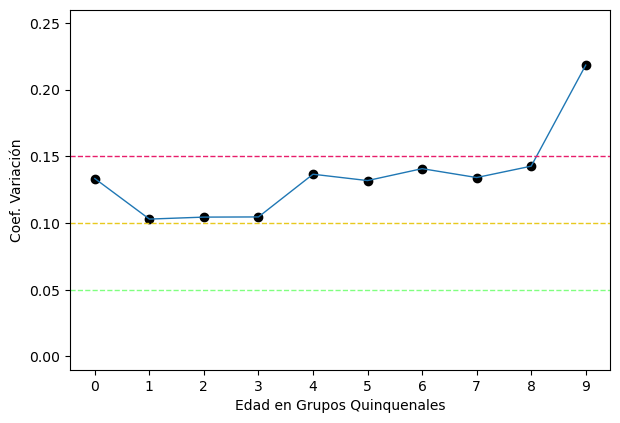

In [38]:
f = plt.figure(figsize = (6,4), dpi = 100)
axes = f.add_axes([0.1,0.1,0.9,0.9])
axes.set_xlabel('Edad en Grupos Quinquenales')
axes.set_ylabel('Coef. Variación')
axes.scatter(range(10), out['CV'], color = '#000000')  
axes.plot(range(10), out['CV'], linewidth = 1)  
axes.axhline(y = 0.05, color = '#80ff80', ls = '--', linewidth = 1)
axes.axhline(y = 0.10, color = '#E8C91E', ls = '--', linewidth = 1)
axes.axhline(y = 0.15, color = '#E81E6B', ls = '--', linewidth = 1)
axes.set_ylim([-0.01,0.26])
axes.set_xticks(ticks = range(10))
plt.show()

## 5 Pruebas de hipótesis

Bajo el paradigma Bayesiano, las hipótesis $H_0$ y $H_1$ se consideran como **cantidades aleatorias** de forma que $\textsf{Pr}(H_0) + \textsf{Pr}(H_1) = 1$ (típicamente $\textsf{Pr}(H_0) = \textsf{Pr}(H_1) = 0.5$). Para probar el sistema simplemente se calculan las probabilidades posteriores de cada una de las hipótesis por medio del teorema de Bayes:
$$
\textsf{Pr}(H_k\mid\mathbf{D})=\frac{\textsf{Pr}(\mathbf{D}\mid H_k)\textsf{Pr}(H_k)}{\textsf{Pr}(\mathbf{D}\mid H_0)\textsf{Pr}(H_0) + \textsf{Pr}(\mathbf{D}\mid H_1)\textsf{Pr}(H_1)}\,,\qquad k=0,1\,,
$$
donde $\mathbf{D}$ denota los datos disponibles. De esta forma, se tiene que
$$
\frac{\textsf{Pr}(H_0\mid\mathbf{D})}{\textsf{Pr}(H_1\mid\mathbf{D})} = \frac{\textsf{Pr}(\mathbf{D}\mid H_0)}{\textsf{Pr}(\mathbf{D}\mid H_1)}\times\frac{\textsf{Pr}(H_0)}{\textsf{Pr}(H_1)}\,,
$$
es decir,
$$
\text{Posibilidades relativas a posteriori} = \text{Factor de Bayes ($B_{01}$)}\times\text{Posibilidades relativas a priori}\,.
$$
En https://saludpublica.mx/index.php/spm/article/view/5678/6216 se presenta una discusión acerca de la traducción correcta de *odds* al español.

La cantidad $\textsf{Pr}(\mathbf{D}\mid H_k)$ se denomina **verosimilitud marginal** o **distribución predictiva previa** bajo el modelo especificado por $H_k$ y se calcula **integrando** sobre el espacio de parámetros,
$$
\textsf{Pr}(\mathbf{D}\mid H_k) = \int p(\mathbf{D}\mid\boldsymbol{\theta}_k, H_k)\,p(\boldsymbol{\theta}_k\mid H_k)\,\text{d}\boldsymbol{\theta}_k\,.
$$
donde $\boldsymbol{\theta}_k$ representa los parámetros del modelo bajo $H_k$.  

Se recomienda interpretar el **factor de Bayes** $B_{10}$ porque sopesar evidencia en contra de $H_0$ es más común, pero también se puede hacer la interpretación de términos de evidencia a favor. Siguiendo a Kass (1995), $B_{10}$ se puede interpretar de la siguiente manera:

| $B_{10}$   | Evidencia en contra de $H_0$  |
|:----------:|:-----------------------------:|
| 1 a 3      | No vale más que una mención   |
| 3 a 20     | Moderada                      |
| 20 a 150   | Fuerte                        |
| > 150      | Decisiva                      |

**Kass, R. E., & Raftery, A. E. (1995). Bayes factors. Journal of the american statistical association, 90(430), 773-795.**

Las pruebas de hipótesis Bayesianas no están restringidas a probar hipótesis por parejas de hipótesis.

Los métodos de pruebas de hipótesis Bayesianos y frecuentistas pueden arrojar resultados muy diferentes (e.g., paradoja de Jeffreys-Lindley, https://michael-franke.github.io/intro-data-analysis/jeffreys-lindley-paradox.html).
        

## 6 Ejemplo: Número de hijos y educación

Se quiere probar el sistema de hipótesis
$$
H_0: \theta_1 = \theta_2\qquad\text{frente a}\qquad H_1: \theta_1\neq\theta_2\,.
$$
En este caso se tiene que 
$$
p(\boldsymbol{y}_1,\boldsymbol{y}_2\mid H_0) = \frac{1}{\prod_{i=1}^{n_1} y_{1,i}!}\,\frac{1}{\prod_{i=1}^{n_2} y_{2,i}!}\,\frac{b^a}{\Gamma(a)}\,\frac{\Gamma(a+s_1+s_2)}{(b+n_1+n_2)^{a+s_1+s_2}}
$$
mientras que 
$$
p(\boldsymbol{y}_1,\boldsymbol{y}_2\mid H_1) = \frac{1}{\prod_{i=1}^{n_1} y_{1,i}!}\,\frac{1}{\prod_{i=1}^{n_2} y_{2,i}!}\,\frac{b^a}{\Gamma(a)}\,\frac{b^a}{\Gamma(a)}\,\frac{\Gamma(a+s_1)}{(b+n_1)^{a+s_1}}\,\frac{\Gamma(a+s_2)}{(b+n_2)^{a+s_2}}
$$
donde $\boldsymbol{y}_j=(y_{j,1},\ldots,y_{j,n_j})$ para $j=1,2$, y $a$ y $b$ son los hiperparámetros del modelo, y por lo tanto el factor de Bayes correspondiente es
$$
B_{01} = \frac{\Gamma(a)}{b^a}\,\frac{\Gamma(a+s_1+s_2)}{\Gamma(a+s_1)\Gamma(a+s_2)}\,\frac{(b+n_1)^{a+s_1}(b+n_2)^{a+s_2}}{(b+n_1+n_2)^{a+s_1+s_2}}\,.
$$

In [39]:
# filtro
indices = (df.P_PARENTESCOR == 1) & (df.P_SEXO == 2) & (df.P_EDADR == 9) & (df.PA1_GRP_ETNIC == 6) & is_in(df.PA_LUG_NAC, [2,3]) & is_in(df.PA_VIVIA_5ANOS, [2,3]) & is_in(df.PA_HNV, [1,2]) & (df.P_ALFABETA == 1)

In [40]:
# y1 : numero de hijos, mujeres de 40 años, sin pregrado o menos
# y2 : numero de hijos, mujeres de 40 años, con pregrado o mas
y1 = df.PA1_THNV[indices & (df.P_NIVEL_ANOSR == 0)]
y2 = df.PA1_THNV[indices & (df.P_NIVEL_ANOSR == 1)]

In [41]:
# tamaños de muestra
n1 = len(y1)
n2 = len(y2)
# estadisticos suficientes
s1 = np.sum(y1)
s2 = np.sum(y2)

In [42]:
# factor de Bayes 10
# calcular en escala log y exponenciar
B01 = np.exp(sp.loggamma(a)-a*np.log(b)+sp.loggamma(a+s1+s2)-sp.loggamma(a+s1)-sp.loggamma(a+s2)+
             (a+s1)*np.log(b+n1)+(a+s2)*np.log(b+n2)-(a+s1+s2)*np.log(b+n1+n2))
B10 = 1/B01
print(B10)

632595071.2720193


In [43]:
# valor p frecuentista (asintotico)
# valor p = Pr(observar datos tan o más extremos en dirección de H1 ∣ H0 es cierta)
yb1 = np.mean(y1)
yb2 = np.mean(y2)
sd1 = np.std(y1)
sd2 = np.std(y2)
z = (yb1 - yb2 - 0)/np.sqrt(sd1**2/n1 + sd2**2/n2)
p = 2*st.norm.sf(abs(z))
print(p)

9.837648689580496e-17
